<a href="https://colab.research.google.com/github/RohanCoderiiitb/TinyML-Harvard/blob/main/HorseOrHumanWithAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2025-06-13 15:33:52--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.207, 173.194.206.207, 142.250.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   198MB/s    in 0.7s    

2025-06-13 15:33:52 (198 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2025-06-13 15:33:52--  https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.207, 173.194.206.207, 142.250.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [applicati

In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [ ]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')
train_horse_names = os.listdir('/tmp/horse-or-human/horses')
print(train_horse_names[:10])
train_human_names = os.listdir('/tmp/horse-or-human/humans')
print(train_human_names[:10])
validation_horse_hames = os.listdir('/tmp/validation-horse-or-human/horses')
print(validation_horse_hames[:10])
validation_human_names = os.listdir('/tmp/validation-horse-or-human/humans')
print(validation_human_names[:10])

['horse42-5.png', 'horse48-1.png', 'horse36-9.png', 'horse07-3.png', 'horse45-4.png', 'horse34-5.png', 'horse04-0.png', 'horse08-8.png', 'horse34-7.png', 'horse25-0.png']
['human04-22.png', 'human13-10.png', 'human05-21.png', 'human05-05.png', 'human06-14.png', 'human17-06.png', 'human16-26.png', 'human02-15.png', 'human04-08.png', 'human10-00.png']
['horse1-127.png', 'horse4-468.png', 'horse6-064.png', 'horse1-224.png', 'horse3-397.png', 'horse3-198.png', 'horse4-345.png', 'horse1-539.png', 'horse3-171.png', 'horse6-089.png']
['valhuman04-20.png', 'valhuman02-06.png', 'valhuman05-25.png', 'valhuman03-09.png', 'valhuman05-13.png', 'valhuman05-24.png', 'valhuman02-15.png', 'valhuman03-22.png', 'valhuman05-22.png', 'valhuman01-14.png']


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [ ]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 98, 98, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 47, 47, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,301,409 (12.59 MB)

 Trainable params: 3,301,409 (12.59 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size=(100, 100),
    batch_size=128,
    class_mode='binary'
)
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human',
    target_size=(100,100),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopper = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=val_generator,
                    callbacks=[early_stopper])

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7865 - loss: 0.4448 - val_accuracy: 0.6055 - val_loss: 1.0110
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8229 - loss: 0.4134 - val_accuracy: 0.5430 - val_loss: 1.5444
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7952 - loss: 0.4350 - val_accuracy: 0.6250 - val_loss: 1.0848
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7954 - loss: 0.4072 - val_accuracy: 0.5742 - val_loss: 1.3386
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8383 - loss: 0.3974 - val_accuracy: 0.5742 - val_loss: 1.4613
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7935 - loss: 0.4305 - val_accuracy: 0.5586 - val_loss: 1.5891
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8165 - loss: 0.4130 - val_accuracy: 0.5703 - val_loss: 1.4985
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8422 - loss: 0.3941 - val_accuracy: 0.5742 - val_loss: 1.4573


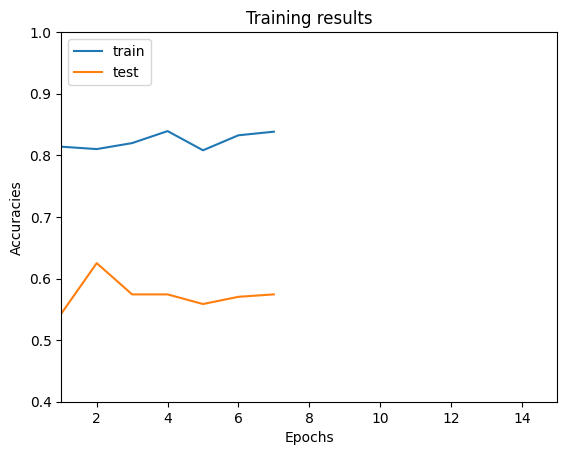

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training results')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.xlim([1, 15])
plt.ylim([0.4, 1.0])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
    # The file is saved in the current directory of Colab
    img = load_img(fn, target_size=(100, 100))
    x = img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)

    prediction = model.predict(x)
    print("Prediction:", prediction[0][0])
    if prediction[0] > 0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")

Saving bhs_educ_pathway_millfield-7712.jpg to bhs_educ_pathway_millfield-7712.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction: 0.703844
bhs_educ_pathway_millfield-7712.jpg is a human
